# Datos del S&P500 

### Fuente de datos

In [7]:
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

## Importacion de librerias

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

## Web Scrapping del link fuente

### Datos de columnas

In [8]:
contenido_html = requests.get(url).text    # Traer la informacion de la pagina
soup = BeautifulSoup(contenido_html, "lxml")  # Hacer mas entendible la informacion
tabla_500 = soup.find("table")               # Encontrar la tabla que me quiero traer

In [9]:
encabezados = tabla_500.tbody      # Creo una variable que contenga el cuerpo de los encabezados de mi tabla
linea_encabezado = encabezados.tr   # voy foltrando la info

nombre_columnas = []                        # lista para guardar los nombres de las columnas
for th in linea_encabezado.find_all("th"):   # Busco este valor en mi data ya que ahi se encuentran los nombres de los encabezados
    nombre_columnas.append(th.text.replace("\n","").strip()) # Limpio el nombre y lo agrego a la lista
nombre_columnas

['Symbol',
 'Security',
 'GICS Sector',
 'GICS Sub-Industry',
 'Headquarters Location',
 'Date added',
 'CIK',
 'Founded']

### Registros

In [10]:
datos_tabla = tabla_500.tbody
len(datos_tabla.find_all("tr"))
data_filas = []                        # lista para guardar los nombres de las columnas
for linea in datos_tabla.find_all("tr"):
    row = []                                  # Busco este valor en mi data ya que ahi se encuentran los nombres de los encabezados
    for td in linea.find_all("td"):
        row.append(td.text.replace("\n","").strip())
    data_filas.append(row)
    
data_filas.remove([])  #Primera linea borrada

In [11]:
len(data_filas)
data_filas

[['MMM',
  '3M',
  'Industrials',
  'Industrial Conglomerates',
  'Saint Paul, Minnesota',
  '1957-03-04',
  '0000066740',
  '1902'],
 ['AOS',
  'A. O. Smith',
  'Industrials',
  'Building Products',
  'Milwaukee, Wisconsin',
  '2017-07-26',
  '0000091142',
  '1916'],
 ['ABT',
  'Abbott',
  'Health Care',
  'Health Care Equipment',
  'North Chicago, Illinois',
  '1957-03-04',
  '0000001800',
  '1888'],
 ['ABBV',
  'AbbVie',
  'Health Care',
  'Pharmaceuticals',
  'North Chicago, Illinois',
  '2012-12-31',
  '0001551152',
  '2013 (1888)'],
 ['ACN',
  'Accenture',
  'Information Technology',
  'IT Consulting & Other Services',
  'Dublin, Ireland',
  '2011-07-06',
  '0001467373',
  '1989'],
 ['ATVI',
  'Activision Blizzard',
  'Communication Services',
  'Interactive Home Entertainment',
  'Santa Monica, California',
  '2015-08-31',
  '0000718877',
  '2008'],
 ['ADM',
  'ADM',
  'Consumer Staples',
  'Agricultural Products',
  'Chicago, Illinois',
  '1957-03-04',
  '0000007084',
  '1902']

In [12]:
df = pd.DataFrame(data=data_filas, columns=nombre_columnas)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             503 non-null    object
 6   CIK                    503 non-null    object
 7   Founded                503 non-null    object
dtypes: object(8)
memory usage: 31.6+ KB


Aparentemente no hay ningun dato faltante, todos los datos son del tipo object

### Distribucion de sectores

In [13]:
sectores = df["GICS Sector"].value_counts()
sectores

Information Technology    76
Industrials               70
Financials                67
Health Care               64
Consumer Discretionary    56
Consumer Staples          33
Utilities                 30
Real Estate               30
Materials                 29
Communication Services    25
Energy                    23
Name: GICS Sector, dtype: int64

<BarContainer object of 11 artists>

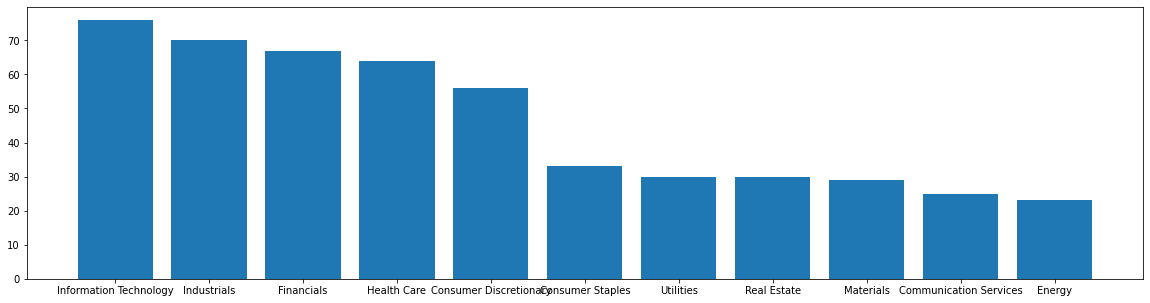

In [14]:

df2 = pd.DataFrame(data=sectores)
x = df2.index
y = df2["GICS Sector"]



fig, ax = plt.subplots(figsize=(20, 5))
ax.bar(x,y)


Podemos observar que hay 11 sectores difetrentes, el sector que mas empresas tiene dentro del S&P500 es el sector de las tecnologias de la informacion mientras que el que menos tiene es el sector de energia

### Formato de fechas

In [15]:
df["Date added"].sort_values(ascending=False).head(10)

458        <1985?
403        <1985?
491        <1985?
490        <1985?
446        <1985?
482        <1985?
213    2023-01-04
428    2022-12-22
198    2022-12-19
47     2022-11-01
Name: Date added, dtype: object

Al querer observar cual es la fecha maxima se observan valores de esta forma "<1985?" se entiende que son empresas que su fecha de ingreso al indice fueron antes de 1985, estas fechas para no tener errores las pondre a todas como "1985-01-01"

In [16]:
df["Date added"] =  df["Date added"].replace("<1985?","1985-01-01")

In [17]:
df["Date added"].unique()

array(['1957-03-04', '2017-07-26', '2012-12-31', '2011-07-06',
       '2015-08-31', '1997-05-05', '1981-03-31', '2015-07-09',
       '1998-10-02', '1999-05-28', '2000-06-05', '1985-04-30',
       '2007-07-12', '2016-05-13', '2016-07-01', '2017-03-20',
       '2017-06-19', '2013-12-02', '1995-07-13', '2014-04-03',
       '2006-04-03', '2005-11-18', '2019-06-07', '1991-09-19',
       '2015-03-23', '1976-06-30', '1980-03-31', '2007-11-19',
       '2016-03-04', '2005-10-03', '2001-08-30', '2013-09-23',
       '1992-01-02', '2008-09-30', '1999-10-12', '1996-04-23',
       '1997-07-28', '1982-11-30', '1995-03-16', '2012-12-24',
       '2022-11-01', '2018-08-28', '2016-05-31', '2007-04-10',
       '1983-11-30', '2019-02-15', '1989-12-01', '1997-01-02',
       '2007-01-10', '1987-12-31', '2017-07-07', '1984-10-31',
       '1983-09-30', '1972-09-30', '2019-12-05', '2010-02-16',
       '1999-06-29', '2020-06-22', '2021-08-30', '2003-11-13',
       '2011-04-04', '1995-03-31', '2009-11-06', '2011-

Al querer ver los datos unicos de fecha, por el mismo acomodo que me da el programa se pueden observar algunas distorciones, estas distorciones son generadas por los valores "2001?", "2009" y los " ", procedo a cambiar esas fechas por su primer dia de ese anio y para los nulos simplemente los dejo asi.

In [18]:
df["Date added"] =  df["Date added"].replace("2001?","2001-01-01")
df["Date added"] =  df["Date added"].replace("2009","2009-01-01")

In [19]:
df["Date added"].sort_values().head(10)

210              
154              
436              
242              
190    1957-03-04
186    1957-03-04
408    1957-03-04
411    1957-03-04
173    1957-03-04
163    1957-03-04
Name: Date added, dtype: object

In [20]:
df[df["Date added"] == ""]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
154,D,Dominion Energy,Utilities,Electric Utilities,"Richmond, Virginia",,0000715957,1983
210,FCX,Freeport-McMoRan,Materials,Copper,"Phoenix, Arizona",,0000831259,1912
242,HUM,Humana,Health Care,Managed Health Care,"Louisville, Kentucky",,0000049071,1961
436,TROW,T. Rowe Price,Financials,Asset Management & Custody Banks,"Baltimore, Maryland",,0001113169,1937


In [21]:
df["Date added"] = pd.to_datetime(df["Date added"])

In [22]:
df.iloc[[210,154,436,242,213]]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
210,FCX,Freeport-McMoRan,Materials,Copper,"Phoenix, Arizona",NaT,0000831259,1912
154,D,Dominion Energy,Utilities,Electric Utilities,"Richmond, Virginia",NaT,0000715957,1983
436,TROW,T. Rowe Price,Financials,Asset Management & Custody Banks,"Baltimore, Maryland",NaT,0001113169,1937
242,HUM,Humana,Health Care,Managed Health Care,"Louisville, Kentucky",NaT,0000049071,1961
213,GEHC,GE HealthCare,Health Care,Health Care Technology,"Chicago, Illinois",2023-01-04,0001932393,1994


### Revisando valores blancos en las columnas

In [23]:
df[df["Symbol"] == ""]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded


In [20]:
df[df["Security"] == ""]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded


In [21]:
df[df["GICS Sector"] == ""]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded


In [22]:
df[df["GICS Sub-Industry"] == ""]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded


In [23]:
df[df["Headquarters Location"] == ""]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded


In [24]:
df[df["CIK"] == ""]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded


In [25]:
df[df["Founded"] == ""]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded


In [24]:
df["Founded"].unique()

array(['1902', '1916', '1888', '2013 (1888)', '1989', '2008', '1982',
       '1949', '1932', '1981', '1955', '1999', '1940', '1998', '1985',
       '1994', '1997', '1908', '1917', '1931', '2019 (1860)', '1969',
       '1934', '1906', '1850', '1919', '1995', '1886', '1894', '1930',
       '1980', '1965', '1982 (1919)', '1954', '1977', '1967', '2004',
       '1927', '1892', '1983 (1885)', '1979', '1978', '1990', '2017',
       '1880', '1998 (1923 / 1874)', '1963', '1897', '1839', '1966',
       '1952', '1976', '1988', '1784', '1996', '1970', '1989 (1887)',
       '1961', '1962', '1939', '1870', '1905', '1973', '1869', '1971',
       '1993', '1972', '2020 (1915)', '2007', '1925', '1984', '1918',
       '1882', '1992', '1946', '1947', '1879', '1847', '1950', '1929',
       '1828', '1913', '1848', '1806', '1849', '2002', '1823', '1945',
       '1958', '1851', '2019', '1987', '2021 (1989)', '1938', '1837',
       '2016 (1969)', '1923', '1986', '1983', '1960', '1904', '1920',
       '1911', '

In [25]:
df["Founded"].max()

'2022'

Hay valores que no tienen una fecha unica de fundacion, esto es por alguna restructuracion de la empresa, ya que no son necesarios estos datos para algo muy importante no los tomare en cuenta sin embargo, hay al menos una empresa que se fundo hace un anio que hoy cotiza en la bolsa de valores y esta en el indice S&P500

In [26]:
df[df["Founded"] == "2022"]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
481,WBD,Warner Bros. Discovery,Communication Services,Broadcasting,"New York City, New York",2022-04-11,0001437107,2022


In [29]:
df.to_csv("Datos/EmpresasS&P500.csv", index=False)

## Datos del S&P 500 obtenidos por yfinance

### Se buscaran los datos de inicios del anio 2000 hasta finales de enero 2023

In [28]:
data = yf.download("^GSPC", start="2000-01-01", end="2023-02-01")

[*********************100%***********************]  1 of 1 completed


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5807 entries, 2000-01-03 to 2023-01-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5807 non-null   float64
 1   High       5807 non-null   float64
 2   Low        5807 non-null   float64
 3   Close      5807 non-null   float64
 4   Adj Close  5807 non-null   float64
 5   Volume     5807 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 317.6 KB


Todos los valores son de tipo flotante a excepcion de la columna volumen que es integer.

El indice esta dado por las fechas y va desde el 2000-01-03 hasta el 2023-01-31

Parece no haber valores nulos

In [30]:
df2 = pd.DataFrame(data=data)
df2.reset_index(inplace=True)  # Cambio el indice y las fechas las convierto en una columna

El valor del volumen es tan grande que no se representa bien en esta descripcion

In [31]:
df2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5807.000000,5807.000000,5807.000000,5807.000000,5807.000000,5.807000e+03
mean,1880.763514,1892.011801,1868.572115,1880.975164,1880.975164,3.300209e+09
std,971.493864,976.565679,965.965887,971.612813,971.612813,1.523901e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08
25%,1184.165039,1191.294983,1176.924988,1183.940002,1183.940002,1.980490e+09
50%,1433.040039,1441.609985,1424.660034,1433.060059,1433.060059,3.406110e+09
75%,2380.524902,2389.440063,2368.250000,2381.554932,2381.554932,4.159240e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,1.145623e+10


In [32]:
df2.info() # Date esta en formato de fecha

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5807 entries, 0 to 5806
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5807 non-null   datetime64[ns]
 1   Open       5807 non-null   float64       
 2   High       5807 non-null   float64       
 3   Low        5807 non-null   float64       
 4   Close      5807 non-null   float64       
 5   Adj Close  5807 non-null   float64       
 6   Volume     5807 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 317.7 KB


### Correlacion 
hay una fuerte correlacion entre todas las columnas a excepcion del volumen

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_7284\1738403036.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True)


<AxesSubplot: >

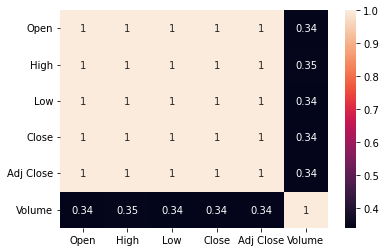

In [35]:
sns.heatmap(df2.corr(), annot=True)

In [36]:
df2.to_csv("Datos/historia_gspc.csv", index=False)

## Carga de datos de las 500 empresas dado por blackrock

In [2]:
black = pd.read_csv("Datos/Datos_blackrock.csv")

In [3]:
black

,Ticker,Name,Sector,Market Value,Weight (%),Notional Value,Shares,Price,Currency
0,AAPL,APPLE INC,Information Technology,"19,741,977,277.52",6.62,"19,741,977,277.52","133,463,881.00",147.92,USD
1,MSFT,MICROSOFT CORP,Information Technology,"16,643,768,699.04",5.58,"16,643,768,699.04","66,532,494.00",250.16,USD
2,AMZN,AMAZON COM INC,Consumer Discretionary,"7,427,187,992.64",2.49,"7,427,187,992.64","79,214,889.00",93.76,USD
3,NVDA,NVIDIA CORP,Information Technology,"5,222,791,972.01",1.75,"5,222,791,972.01","22,223,701.00",235.01,USD
4,TSLA,TESLA INC,Consumer Discretionary,"4,973,980,542.66",1.67,"4,973,980,542.66","23,955,982.00",207.63,USD
...,...,...,...,...,...,...,...,...,...
501,FOX,FOX CORP CLASS B,Communication,"40,747,698.45",0.01,"40,747,698.45","1,240,417.00",32.85,USD
502,DVA,DAVITA INC,Health Care,"40,528,890.12",0.01,"40,528,890.12","489,243.00",82.84,USD
503,LUMN,LUMEN TECHNOLOGIES INC,Communication,"28,809,672.20",0.01,"28,809,672.20","8,473,433.00",3.40,USD
504,DISH,DISH NETWORK CORP CLASS A,Communication,"27,297,341.40",0.01,"27,297,341.40","2,237,487.00",12.20,USD


In [4]:
black.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ticker          506 non-null    object 
 1   Name            506 non-null    object 
 2   Sector          506 non-null    object 
 3   Market Value    506 non-null    object 
 4   Weight (%)      506 non-null    float64
 5   Notional Value  506 non-null    object 
 6   Shares          506 non-null    object 
 7   Price           506 non-null    object 
 8   Currency        506 non-null    object 
dtypes: float64(1), object(8)
memory usage: 35.7+ KB
